# Laboratorio #3
---
Nancy Mazariegos 22513

Santiago Pereira 22318

---

### Para este lab considere:

• Utilizar scipy.integrate.odeint para la dinámica del SIR

• Parámetros: β = 0.35, γ = 0.1, infectados iniciales = 10, población = 10,000

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

N = 10000 
I0 = 10 
R0 = 0
S0 = N - I0 - R0
beta = 0.35
gamma = 0.1
days = 160
t = np.linspace(0, days, days)

def sir(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

---


### a. Línea base: Sin intervenciones (modelo SIR)

In [20]:
def run_base():
    y0 = S0, I0, R0
    ret = odeint(sir, y0, t, args=(beta, gamma))
    S, I, R = ret.T
    return S, I, R

S_base, I_base, R_base = run_base()

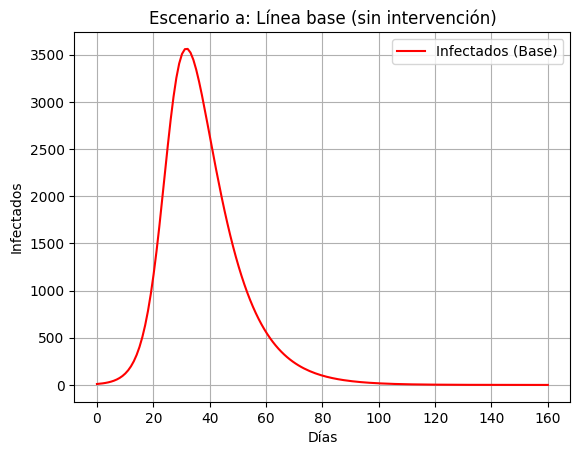

Total de infectados (base): 9660


In [21]:
plt.plot(t, I_base, label="Infectados (Base)", color='red')
plt.title("Escenario a: Línea base (sin intervención)")
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.grid(True)
plt.legend()
plt.show()

print("Total de infectados (base):", int(R_base[-1]))


Sin ninguna intervención, el virus se propagó rápidamente y casi toda la población (9,660 personas) se infectó.
El pico de contagios fue alto y ocurrió rápido, mostrando que no actuar permite que la epidemia se salga de control.

---

### b. Lotería: Tasa de vacunación ↑ en 0,02/día después de 100 casos

In [22]:
def run_lottery():
    S, I, R = [S0], [I0], [R0]
    v_rate = 0.0
    for i in range(1, days):
        if I[-1] > 100:
            v_rate = 0.02 * N
        dS = -beta * S[-1] * I[-1] / N - v_rate
        dI = beta * S[-1] * I[-1] / N - gamma * I[-1]
        dR = gamma * I[-1] + v_rate
        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)
    return np.array(S), np.array(I), np.array(R)

S_lottery, I_lottery, R_lottery = run_lottery()


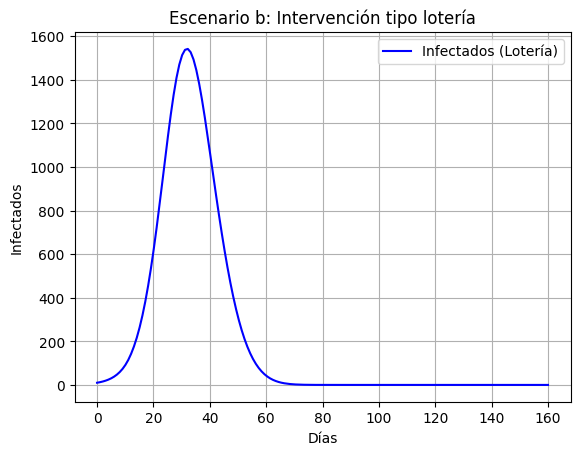

Total de infectados (lotería): 33223


In [23]:
plt.plot(t, I_lottery, label="Infectados (Lotería)", color='blue')
plt.title("Escenario b: Intervención tipo lotería")
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.grid(True)
plt.legend()
plt.show()

print("Total de infectados (lotería):", int(R_lottery[-1]))


La intervención tipo lotería sí ayudó a reducir los contagios, pero no lo suficiente.
Aunque hubo menos infectados (33,223) que sin intervención, el virus igual se propagó mucho, lo que indica que actuar tarde no es tan efectivo.

---

### c. Mandato: Vacunación masiva si Rₜ > 1

In [24]:
def run_mandate():
    S, I, R = [S0], [I0], [R0]
    vaccinated = False
    for i in range(1, days):
        Rt = beta / gamma
        if not vaccinated and Rt > 1:
            vac = 0.5 * N
            S[-1] -= vac
            R[-1] += vac
            vaccinated = True
        dS = -beta * S[-1] * I[-1] / N
        dI = beta * S[-1] * I[-1] / N - gamma * I[-1]
        dR = gamma * I[-1]
        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)
    return np.array(S), np.array(I), np.array(R)

S_mandate, I_mandate, R_mandate = run_mandate()

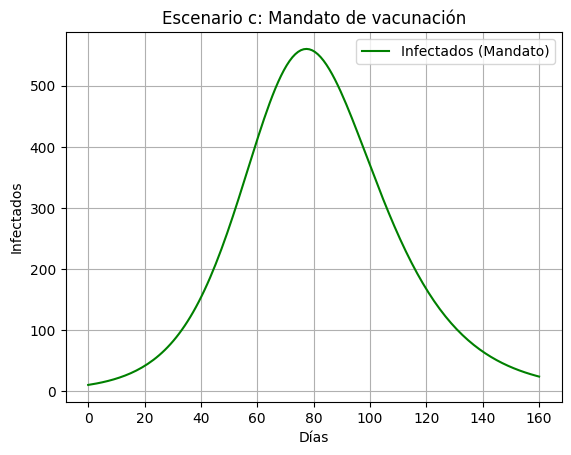

Total de infectados (mandato): 8545


In [25]:
plt.plot(t, I_mandate, label="Infectados (Mandato)", color='green')
plt.title("Escenario c: Mandato de vacunación")
plt.xlabel("Días")
plt.ylabel("Infectados")
plt.grid(True)
plt.legend()
plt.show()

print("Total de infectados (mandato):", int(R_mandate[-1]))

El mandato de vacunación fue la intervención más efectiva.
Con solo 8,545 personas infectadas, logró reducir mucho los contagios comparado con los otros escenarios.
Además, el pico fue más bajo y tardío, lo que da más tiempo para reaccionar.

---

### Comparación y conclusiones

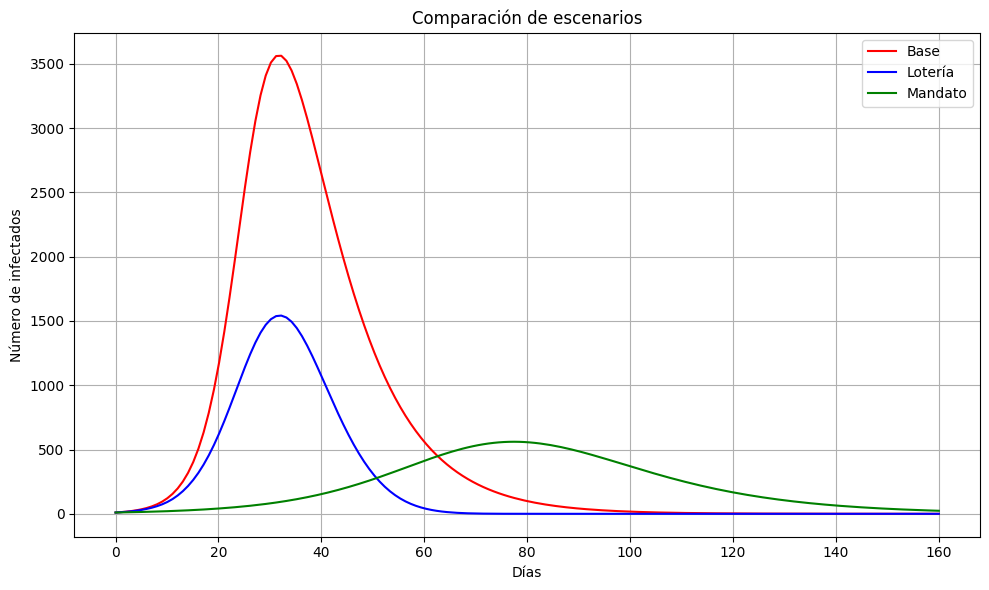

In [26]:
plt.figure(figsize=(10,6))
plt.plot(t, I_base, label="Base", color='red')
plt.plot(t, I_lottery, label="Lotería", color='blue')
plt.plot(t, I_mandate, label="Mandato", color='green')
plt.title("Comparación de escenarios")
plt.xlabel("Días")
plt.ylabel("Número de infectados")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
print("Resumen de infectados finales:")
print("Base:", int(R_base[-1]))
print("Lotería:", int(R_lottery[-1]))
print("Mandato:", int(R_mandate[-1]))

Resumen de infectados finales:
Base: 9660
Lotería: 33223
Mandato: 8545


---

### Conclusiones

- Mandato de vacunación fue el escenario más efectivo: menos contagios (8,545) y un pico más controlado.

- Escenario base tuvo casi toda la población infectada (9,660), con un pico muy alto y rápido.

- Lotería fue la menos efectiva: aunque bajó el pico comparado con la base, terminó con más contagios (33,223) porque actuó muy tarde.

Con esto podemos concluir que evidentemente actuar a tiempo y exigencias se reducen mucho más los contagios que una intervención tardía o ninguna.